In [515]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import harmonic_mean
from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import cosine_similarity

In [516]:
df = pd.read_csv(r"C:\Users\ABHISHEK\Downloads\coursea_data.csv")

In [517]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [518]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [519]:
df1 = df.copy()

In [520]:
df1 = df.drop(['course_organization'],axis=1)

In [521]:
df.shape

(891, 6)

In [522]:
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [523]:
df.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

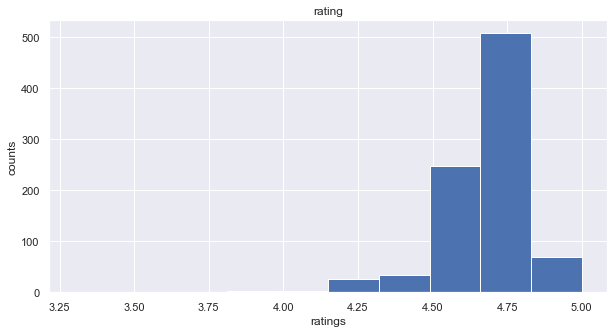

In [524]:
#course_rating 
plt.figure(figsize=[10,5])
plt.hist(data = df , x = 'course_rating')
plt.xlabel("ratings")
plt.ylabel("counts")
plt.title("rating");

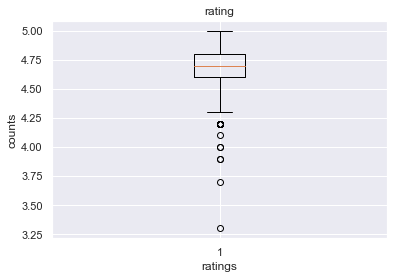

In [525]:
plt.boxplot(data =df , x = 'course_rating');
plt.xlabel("ratings")
plt.ylabel("counts")
plt.title("rating");

In [526]:
#as wee see from the two plots that there is outliers in the rating course and the most of rating between 4.25 to 5

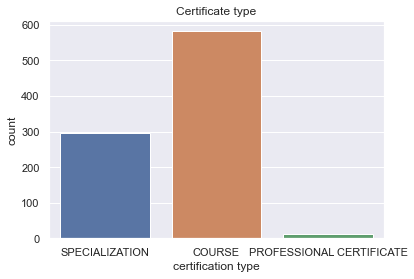

In [527]:
#Counts of course Certification Types 
sns.countplot(data = df , x = 'course_Certificate_type')
plt.xlabel("certification type")
plt.ylabel("count")
plt.title("Certificate type");

In [528]:
#as wee see that the most type is normal courses and the professional is the less one

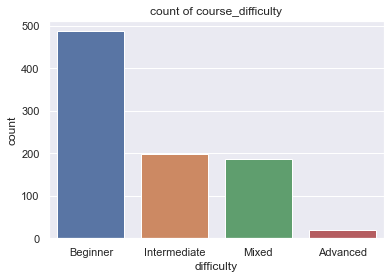

In [529]:
#counts of difficulty Level Of Courses
sns.countplot(data = df , x = 'course_difficulty')
plt.xlabel("difficulty")
plt.ylabel("count")
plt.title("count of course_difficulty");

In [530]:
#here the beginner courses are the most courses in our data and advanced are the less one between them 

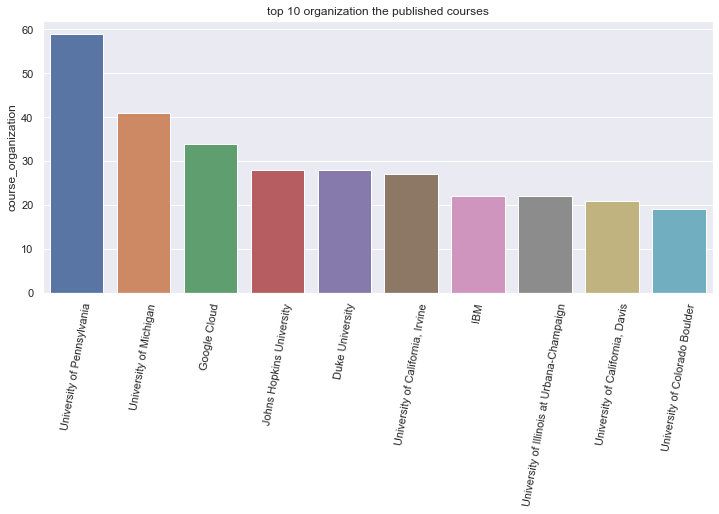

In [531]:
## top 10 organization that published courses
plt.figure(figsize = [12,5])
top_org = pd.DataFrame(df['course_organization'].value_counts()).head(10)
sns.barplot(x = top_org.index , y = top_org.course_organization)
plt.title("top 10 organization the published courses")
plt.xticks(rotation = 80);


### Bivariate Exploration

In [532]:
# first we want to change the students enrolled number  to make it float 
df.course_students_enrolled = [float(str(i[:-1])) for i in df.course_students_enrolled]

<AxesSubplot:xlabel='course_Certificate_type', ylabel='count'>

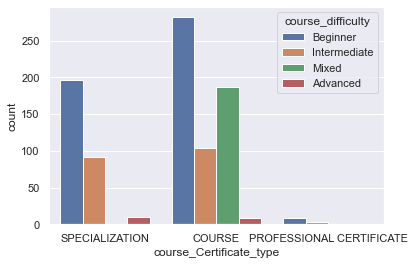

In [533]:
# now lets see how many certification type for each difficulty
sns.countplot(data = data , x = 'course_Certificate_type' , hue = 'course_difficulty')

as wee see that the normal course include the four type of difficulty and professional have beginner and intemediate only and have a small number of these types finally specialization have 3 difficulty type

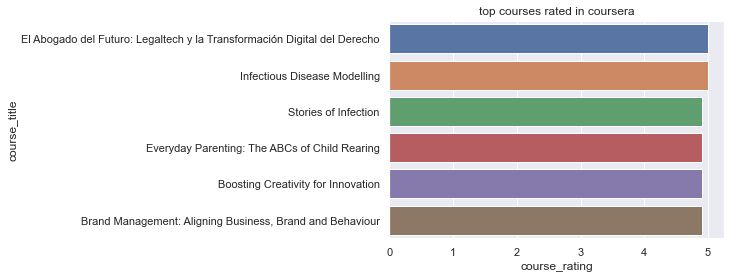

In [534]:
# now let's get top courses based on rating and based on student enroll
top_rate = pd.DataFrame(df.sort_values(by = 'course_rating' , ascending = False))[['course_title','course_rating']].head(6)
sns.barplot(data = top_rate , x = 'course_rating' , y = 'course_title')
plt.title('top courses rated in coursera');

In [535]:
# top_enroll
print(df.groupby("course_title")['course_students_enrolled'].sum().sort_values(ascending = False))


course_title
Data Science                                                                830.0
Career Success                                                              790.0
English for Career Development                                              760.0
Successful Negotiation: Essential Strategies and Skills                     750.0
Data Science: Foundations using R                                           740.0
                                                                            ...  
Infectious Disease Modelling                                                  1.6
Blockchain Revolution in Financial Services                                   1.6
Python for Everybody                                                          1.5
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho      1.5
Programming for Everybody (Getting Started with Python)                       1.3
Name: course_students_enrolled, Length: 888, dtype: float64


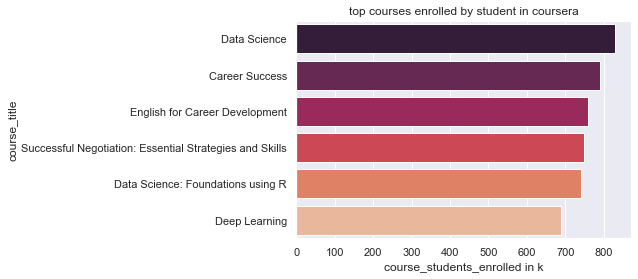

In [536]:
top_enroll = pd.DataFrame(data.sort_values(by = 'course_students_enrolled', ascending = False)).head(6)
sns.barplot(data = top_enroll , x = 'course_students_enrolled' , y = 'course_title' , palette = 'rocket')
plt.xlabel("course_students_enrolled in k")
plt.title('top courses enrolled by student in coursera');

### Multivariate Exploration

<AxesSubplot:xlabel='course_difficulty', ylabel='course_rating'>

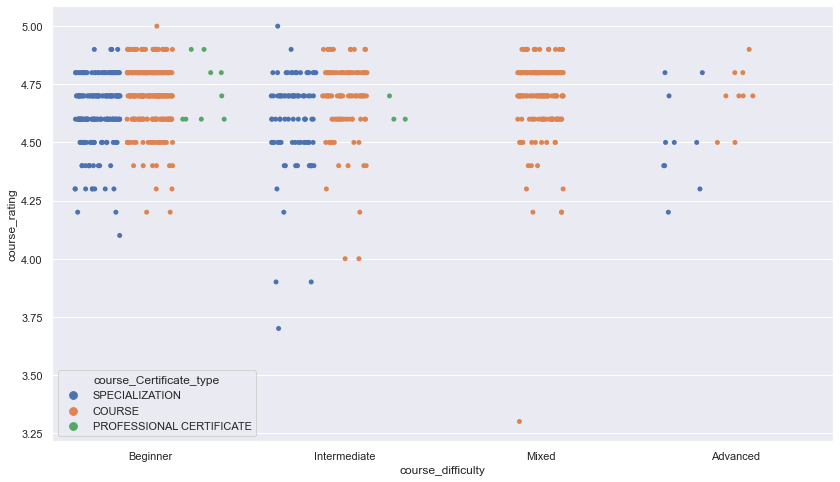

In [537]:
plt.figure(figsize = [14,8])
sns.stripplot(data = df , x = 'course_difficulty',y = 'course_rating', hue = 'course_Certificate_type',jitter = 0.35 , dodge = True)

as wee see here in the beginner for exmaple the normal courses have most rate and number of courses than other and professional have high rate also but lower number of courses

(0.0, 400.0)

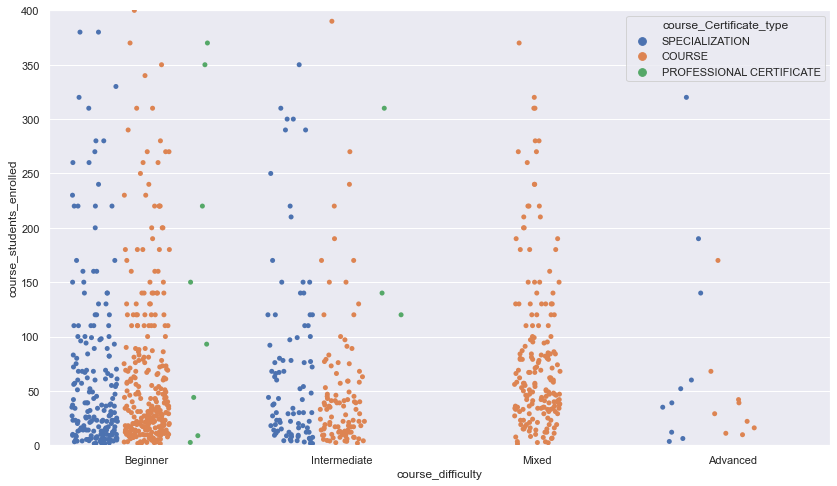

In [538]:
plt.figure(figsize = [14,8])
sns.stripplot(data = df , x = 'course_difficulty',y = 'course_students_enrolled', hue = 'course_Certificate_type',jitter = 0.35, dodge = True )
plt.ylim([0,400])

### conclusion

1. In this dataset i found that the most popular courses is normal courses
2. the Beginner courses are the most popular courses in coursera
3. But the professional courses type are the most type of courses that student enrolled in it 
4. then the mixed difficulty type of courses also the most that student enrolled then the beginner courses
5. the most organization published courses in coursera is University of Pennsylvania 

### Model Building

In [539]:
df1.course_students_enrolled.apply(lambda count : count[-1]).value_counts()

k    887
m      4
Name: course_students_enrolled, dtype: int64

In [540]:
df1 = df1[df1.course_students_enrolled.str.endswith('k')]


In [541]:
Course_Enrolled = df1['course_students_enrolled'].str.replace('[km]','')

C:\Users\ABHISHEK\AppData\Local\Temp/ipykernel_31992/2108320667.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Course_Enrolled = df1['course_students_enrolled'].str.replace('[km]','')


In [542]:
Course_Enrolled

0      5.3
1       17
2      130
3       91
4      320
      ... 
886     52
887     21
888     30
889    9.8
890     38
Name: course_students_enrolled, Length: 887, dtype: object

In [543]:
df1.rename(columns = {'course_students_enrolled':'students_enrolled'}, inplace = True)

In [544]:
df2 = pd.concat([df1,Course_Enrolled],axis=1)
df2.drop(['students_enrolled'],axis=1,inplace=True)

In [545]:
df2.head()

,course_title,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,SPECIALIZATION,4.7,Beginner,5.3
1,A Crash Course in Causality: Inferring Causal...,COURSE,4.7,Intermediate,17
2,A Crash Course in Data Science,COURSE,4.5,Mixed,130
3,A Law Student's Toolkit,COURSE,4.7,Mixed,91
4,A Life of Happiness and Fulfillment,COURSE,4.8,Mixed,320


In [546]:
minmax_scaler = MinMaxScaler()
scaled_ratings = minmax_scaler.fit_transform(df2[['course_rating','course_students_enrolled']])

In [547]:
df2['course_rating'] = scaled_ratings[:,0]
df2['course_students_enrolled'] = scaled_ratings[:,1]
df2['overall_rating'] = df2[['course_rating','course_students_enrolled']].apply(lambda row : harmonic_mean(row), axis=1)

In [548]:
df2.head()

,course_title,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,overall_rating
0,(ISC)² Systems Security Certified Practitioner...,SPECIALIZATION,0.823529,Beginner,0.004587,0.009122
1,A Crash Course in Causality: Inferring Causal...,COURSE,0.823529,Intermediate,0.018709,0.036586
2,A Crash Course in Data Science,COURSE,0.705882,Mixed,0.155100,0.254319
3,A Law Student's Toolkit,COURSE,0.823529,Mixed,0.108027,0.190999
4,A Life of Happiness and Fulfillment,COURSE,0.882353,Mixed,0.384430,0.535534


In [549]:
df2 = df2[df2.course_title.apply(lambda title : detect(title) == 'en')]

In [550]:
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df2.course_title)

In [556]:
def Recommend_me (title, recomm_count=5) : 
    title_vector = vectorizer.transform([title])
    cosine_sim = cosine_similarity(vectors, title_vector)
    idx = np.argsort(np.array(cosine_sim[:,0]))[-recomm_count:]
    sdf = df2.iloc[idx].sort_values(by='overall_rating', ascending=False)
    return sdf

In [557]:
Recommend_me("A Law Student's Toolkit")

,course_title,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,overall_rating
3,A Law Student's Toolkit,COURSE,0.823529,Mixed,0.108027,0.190999
804,The Manager's Toolkit: A Practical Guide to Ma...,COURSE,0.764706,Mixed,0.054919,0.102477
41,An Introduction to American Law,COURSE,0.882353,Beginner,0.025951,0.050418
164,Corporate & Commercial Law I: Contracts & Empl...,COURSE,0.882353,Intermediate,0.010260,0.020283
406,Healthcare Law,SPECIALIZATION,0.823529,Intermediate,0.000241,0.000483
